In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')

demo = pd.read_csv('/Users/patricksmith/Desktop/simple_demographics.csv')

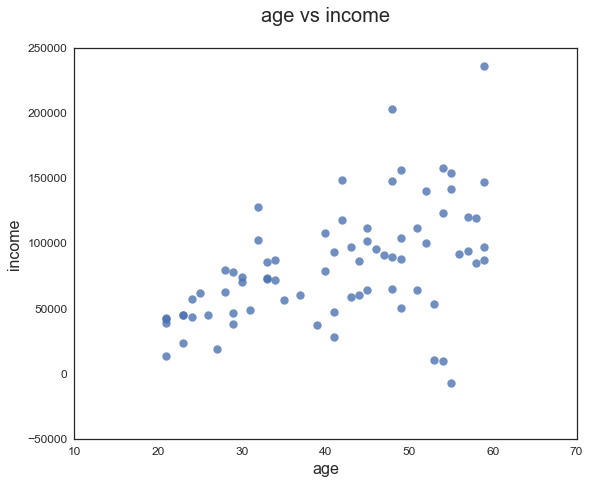

In [3]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()

ax = sns.regplot('age','income', data=demo, fit_reg=False, scatter_kws={'s':70}, ax=ax)
ax.set_ylabel('income',fontsize=16)
ax.set_xlabel('age',fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
ax.set_title('age vs income\n', fontsize=20)

plt.show()

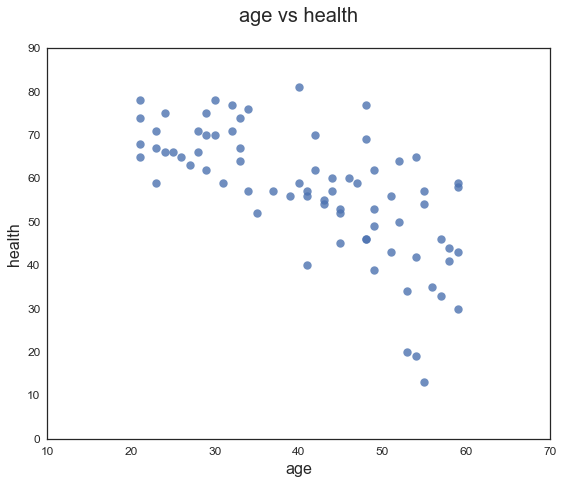

In [4]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()

ax = sns.regplot('age','health', data=demo, fit_reg=False, scatter_kws={'s':70}, ax=ax)
ax.set_ylabel('health',fontsize=16)
ax.set_xlabel('age',fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
ax.set_title('age vs health\n', fontsize=20)

plt.show()

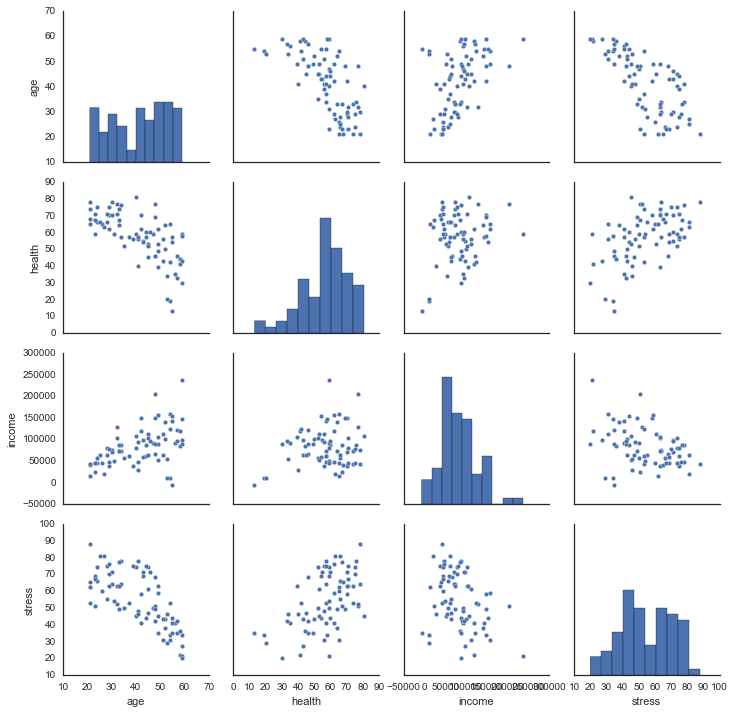

In [5]:
sns.pairplot(demo)

In [7]:
demo_noage = demo[['health', 'income', 'stress']]
demo_noage = (demo_noage - demo_noage.mean()) / demo_noage.std()

In [8]:
demo_noage_corr = np.corrcoef(demo_noage.values.T)
demo_noage.corr()

,health,income,stress
health,1.000000,0.192037,0.527663
income,0.192037,1.000000,-0.347925
stress,0.527663,-0.347925,1.000000


In [9]:
eig_vals, eig_vecs = np.linalg.eig(demo_noage_corr)
print eig_vals
print eig_vecs

[ 0.26996948  1.55645677  1.17357375]
[[ 0.59525118 -0.6187659  -0.5126449 ]
 [-0.46791364  0.25173885 -0.84716255]
 [-0.65324793 -0.74414804  0.13968116]]


In [10]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print cum_var_exp

[  51.88189228   91.00101735  100.        ]


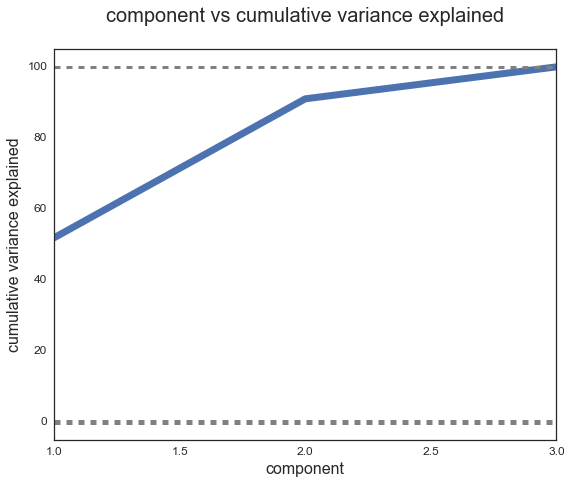

In [13]:
plt.figure(figsize=(9,7))

component_number = [1,2,3]

plt.plot(component_number, cum_var_exp, lw=7)

plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

ax = plt.gca()
ax.set_xlim([1,3])
ax.set_ylim([-5,105])

ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

In [14]:
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)

In [15]:
weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                 value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print "Weight data 2d PCA projection matrix:\n,", weight_2d_projection

Weight data 2d PCA projection matrix:
, [[-0.6187659  -0.5126449 ]
 [ 0.25173885 -0.84716255]
 [-0.74414804  0.13968116]]


In [16]:
Z = demo_noage.dot(weight_2d_projection)

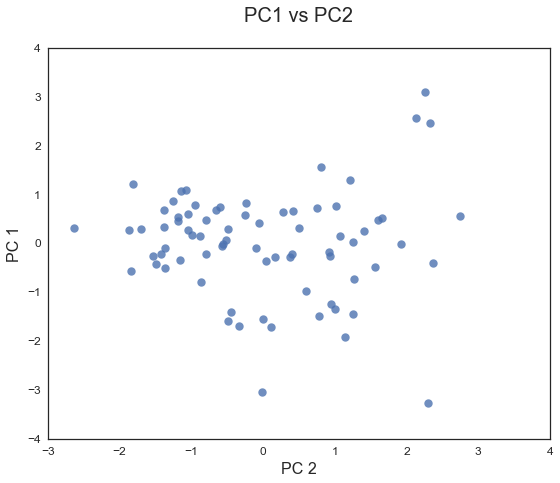

In [18]:
fig = plt.figure(figsize=(9,7))

ax = plt.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_ylabel('PC 1', fontsize=16)
ax.set_xlabel('PC 2', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

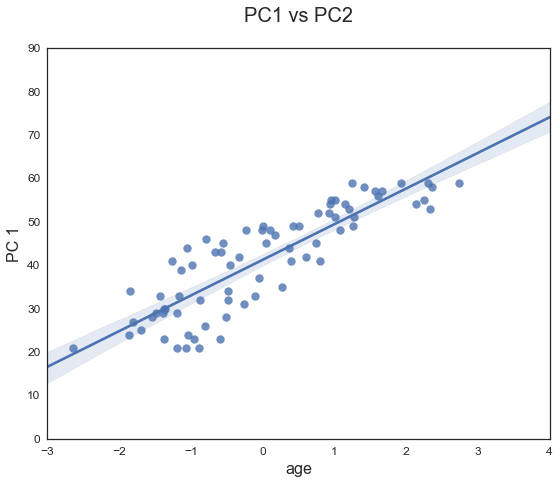

In [19]:
fig = plt.figure(figsize=(9,7))

ax = plt.gca()
ax = sns.regplot(Z.iloc[:,0], demo.age.values,
                fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_ylabel('PC 1', fontsize=16)
ax.set_xlabel('age', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
ax.set_title('PC1 vs age\n', fontsize=20)

plt.show()

In [20]:
demo_pcs = demo.copy()

demo_pcs = (demo - demo.mean()) / demo.std()

demo_pcs['PC1'] = Z.iloc[:,0]
demo_pcs['PC2'] = Z.iloc[:,1]

In [22]:
demo_pcs = pd.melt(demo_pcs, id_vars=['PC1', 'PC2'])

In [23]:
demo_pcs.head()

,PC1,PC2,variable,value
0,-0.882350,0.150070,age,-1.701609
1,-0.104542,-0.102205,age,-0.692750
2,-1.372329,-0.496715,age,-0.944964
3,-0.867671,-0.797774,age,-0.776821
4,1.566225,-0.491018,age,1.324968


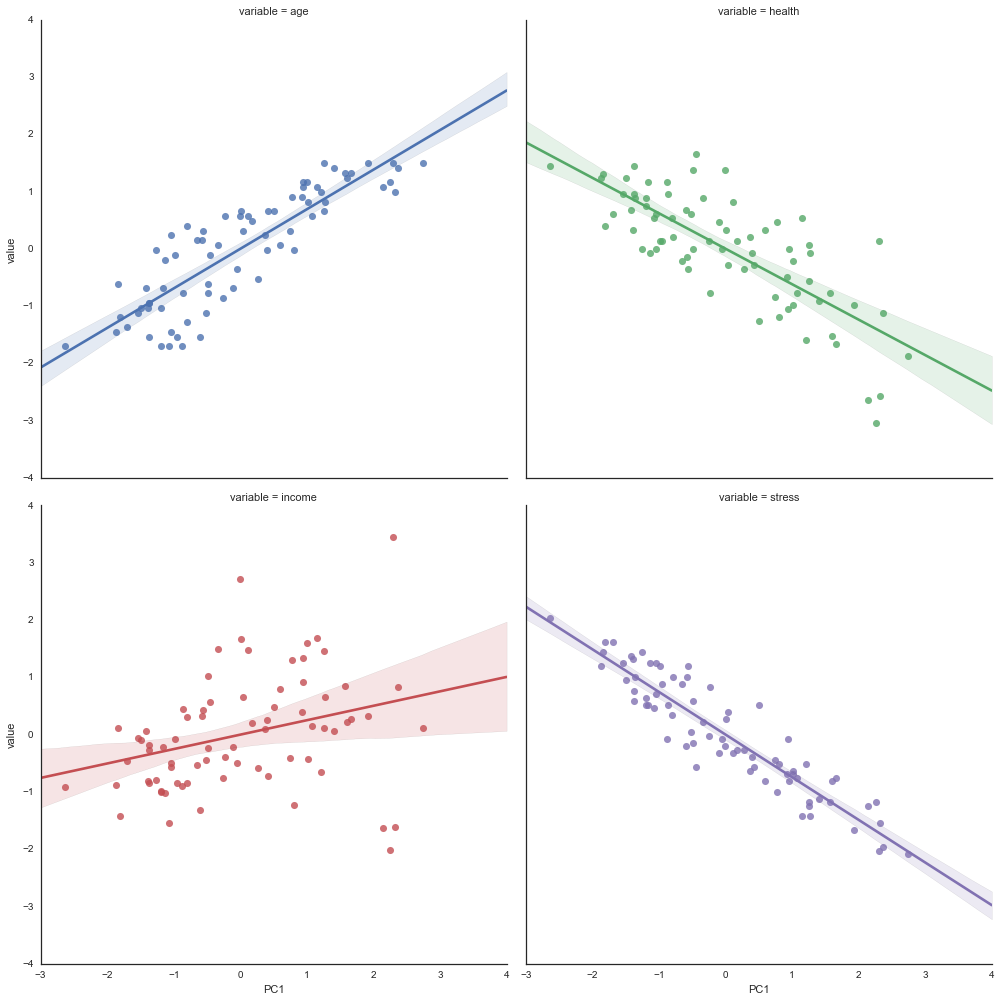

In [24]:
pc1= sns.lmplot(x="PC1", y="value", col="variable", hue="variable",
               data=demo_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

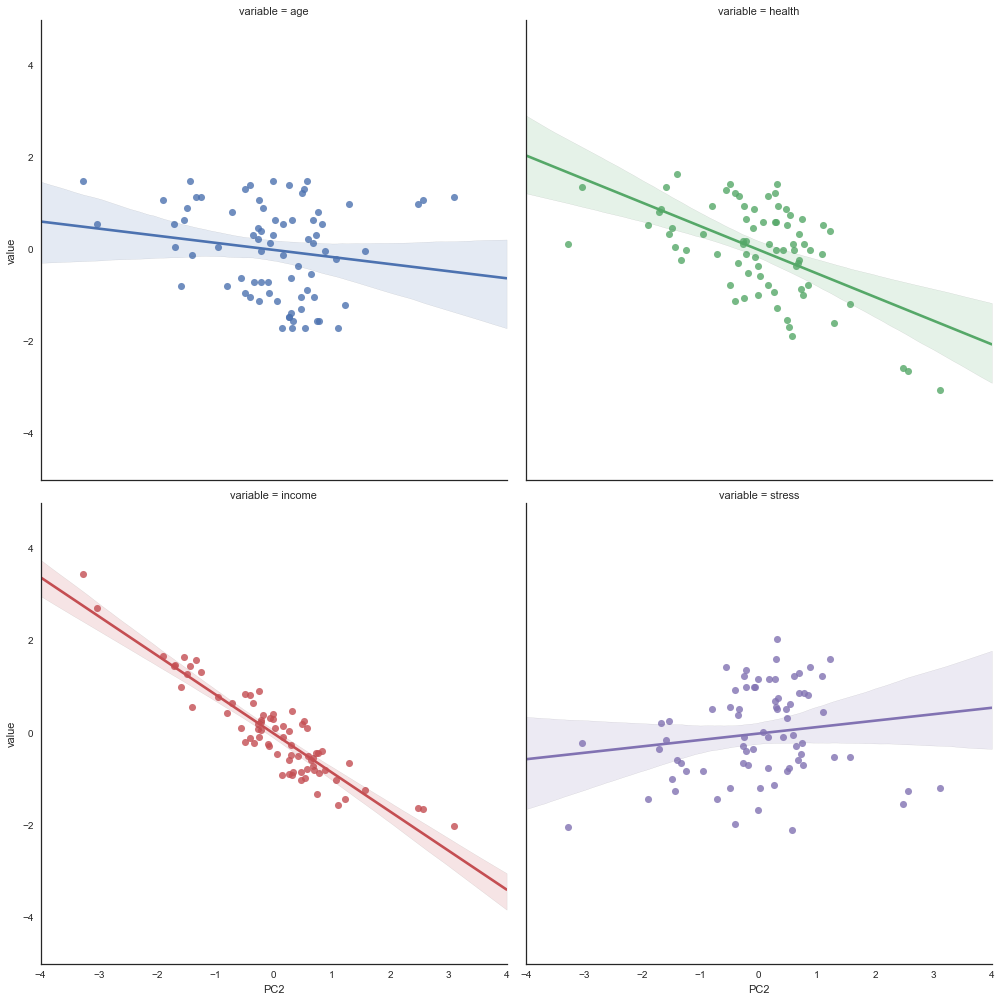

In [25]:
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable",
               data=demo_pcs, col_wrap=2, size=7, scatter_kws={'s':50})